In [1]:
import importlib
import data_clean_Kmodes
importlib.reload(data_clean_Kmodes)
import data_cleaning
importlib.reload(data_cleaning)
import data_visualization_fran
importlib.reload(data_visualization_fran)
import data_visualization_kira
importlib.reload(data_visualization_kira)

<module 'data_visualization_kira' from 'c:\\Users\\Francisco\\tech_projects\\ECE143_Project\\heart-disease-analysis\\SubmissionFiles\\data_visualization_kira.py'>

In [11]:
cleaned_data = data_cleaning.main()

Num rows before cleaning: 10000
Num of cols before cleaning: 21

Num of rows after cleaning with DROP: 7067
Num of cols after cleaning with DROP: 21
Duplicate rows in cleaned DROP: 0

Num of rows after cleaning with KNN: 10000
Num of cols after cleaning with KNN: 21
Duplicate rows in cleaned KNN: 0

Gender
Male      3564
Female    3503
Name: count, dtype: int64

Number of men in clean with DROP: 3564
Number of women in clean with DROP: 3503

Gender
Male      5022
Female    4978
Name: count, dtype: int64

Number of men in clean with KNN: 5022
Number of women in clean with KNN: 4978
Heart Disease Status
No     2000
Yes    2000
Name: count, dtype: int64


In [2]:
cleaned_data_Kmodes = data_clean_Kmodes.main()

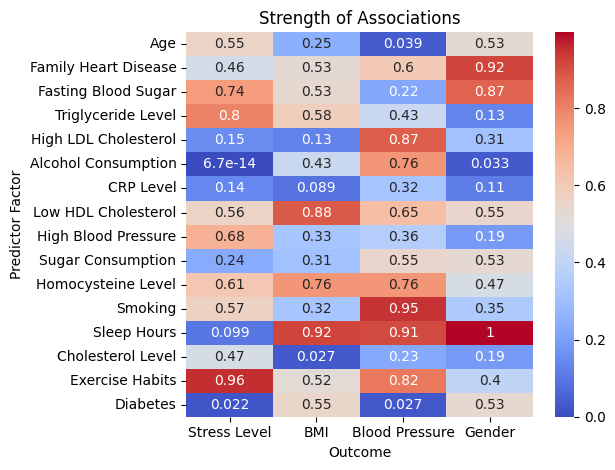

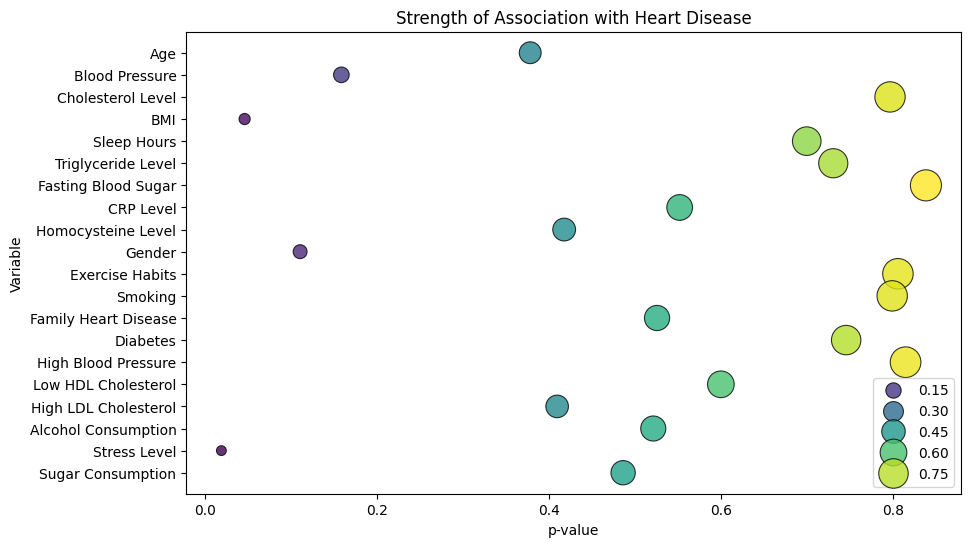

,Variable,Test,p-value
0,Age,ANOVA,0.378055
1,Blood Pressure,ANOVA,0.158647
2,Cholesterol Level,ANOVA,0.796122
3,BMI,ANOVA,0.046229
4,Sleep Hours,ANOVA,0.699361
5,Triglyceride Level,ANOVA,0.730159
6,Fasting Blood Sugar,ANOVA,0.837830
7,CRP Level,ANOVA,0.551708
8,Homocysteine Level,ANOVA,0.417522
9,Gender,chi-square,0.110712


In [3]:
numerical_vars = ["Age", "Blood Pressure", "Cholesterol Level", "BMI", "Sleep Hours", "Triglyceride Level", "Fasting Blood Sugar", "CRP Level", "Homocysteine Level"]

categorical_vars = ['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol', 'Alcohol Consumption', 'Stress Level', 'Sugar Consumption']

outcomes = ["Stress Level", "BMI", "Blood Pressure", "Gender"]

data_visualization_kira.compute_plot_indicators_associations_heatmap(cleaned_data_Kmodes, outcomes, numerical_vars, categorical_vars)

data_visualization_kira.compute_plot_heart_disease_associations(cleaned_data_Kmodes, numerical_vars, categorical_vars)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      10000 non-null  float64 
 1   Gender                   10000 non-null  object  
 2   Blood Pressure           10000 non-null  float64 
 3   Cholesterol Level        10000 non-null  float64 
 4   Exercise Habits          10000 non-null  object  
 5   Smoking                  10000 non-null  object  
 6   Family Heart Disease     10000 non-null  object  
 7   Diabetes                 10000 non-null  object  
 8   BMI                      10000 non-null  float64 
 9   High Blood Pressure      10000 non-null  object  
 10  Low HDL Cholesterol      10000 non-null  object  
 11  High LDL Cholesterol     10000 non-null  object  
 12  Alcohol Consumption      10000 non-null  category
 13  Stress Level             10000 non-null  category
 14  Sleep H

ValueError: No objects to concatenate

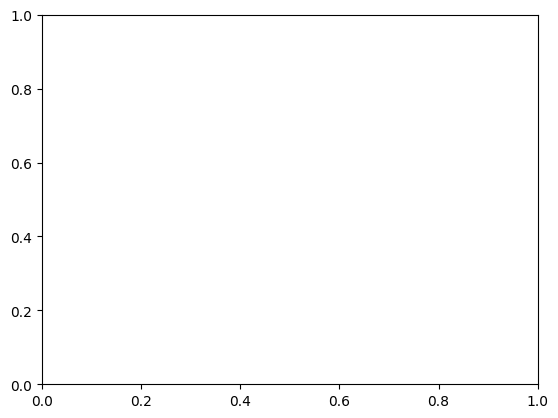

In [ ]:
import pandas as pd

# Check if DataFrame is empty
if cleaned_data_Kmodes.empty:
    raise ValueError("The DataFrame 'cleaned_data_Kmodes' is empty")

# Check if required columns exist in the DataFrame
required_columns = ["BMI", "Heart Disease Status"]
for col in required_columns:
    if col not in cleaned_data_Kmodes.columns:
        raise ValueError(f"Column '{col}' is missing from the DataFrame")

# Check if required columns contain data
for col in required_columns:
    if cleaned_data_Kmodes[col].isnull().all():
        raise ValueError(f"Column '{col}' contains no data")

# Add Cholesterol Category
cleaned_data_Kmodes["Cholesterol Category"] = pd.cut(
    cleaned_data_Kmodes["Cholesterol Level"],
    bins=[0, 199, 239, float("inf")],  
    labels=["Normal", "Elevated", "High"],  
    right=True  
)
cleaned_data_Kmodes["Cholesterol Category"] = pd.Categorical(cleaned_data_Kmodes["Cholesterol Category"], categories=["Normal", "Elevated", "High"], ordered=True)

# Add BMI Category
cleaned_data_Kmodes["BMI Category"] = pd.cut(
    cleaned_data_Kmodes["BMI"],
    bins=[0, 18.5, 25, 30, float("inf")],  
    labels=["Underweight", "Normal", "Overweight", "Obese"],  
    right=True  
)
cleaned_data_Kmodes["BMI Category"] = pd.Categorical(cleaned_data_Kmodes["BMI Category"], categories=["Underweight", "Normal", "Overweight", "Obese"], ordered=True)


# Add Blood Pressure Category
cleaned_data_Kmodes["Blood Pressure Category"] = pd.cut(
    cleaned_data_Kmodes["Blood Pressure"],
    bins=[0, 120, 129, 139, float("inf")],
    labels=["Normal", "Elevated", "High", "Very High"],  
    right=True  
)
cleaned_data_Kmodes["Blood Pressure Category"] = pd.Categorical(cleaned_data_Kmodes["Blood Pressure Category"], categories=["Normal", "Elevated", "High", "Very High"], ordered=True)

# Order the Stress Level and Alcohol Consumption as well
cleaned_data_Kmodes["Stress Level"] = pd.Categorical(cleaned_data_Kmodes["Stress Level"], categories=["Low", "Medium", "High"], ordered=True)
cleaned_data_Kmodes["Alcohol Consumption"] = pd.Categorical(cleaned_data_Kmodes["Alcohol Consumption"], categories=["Low", "Medium", "High"], ordered=True)

# Print DataFrame info for debugging
print(cleaned_data_Kmodes.info())
print(cleaned_data_Kmodes.head())

In [ ]:
# Using dropped data and KNNImputer
data_visualization_fran.create_histoplot(cleaned_data, "BMI", "Heart Disease Status")
data_visualization_fran.create_histoplot(cleaned_data, "BMI", "Heart Disease Status", cat="Cholesterol Category")

# Using Kmodes cleaned data
data_visualization_fran.create_histoplot(cleaned_data_Kmodes, "BMI", "Heart Disease Status")
data_visualization_fran.create_histoplot(cleaned_data_Kmodes, "BMI", "Heart Disease Status", cat="Cholesterol Category")

ValueError: No objects to concatenate

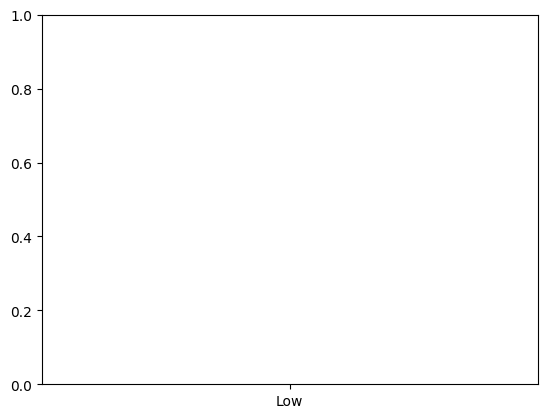

In [ ]:
# Using dropped data and KNNImputer
data_visualization_fran.create_histoplot(cleaned_data, "Stress Level", "Heart Disease Status")
data_visualization_fran.create_histoplot(cleaned_data, "Stress Level", "Heart Disease Status", cat="Alcohol Consumption")

# Using Kmodes cleaned data
data_visualization_fran.create_histoplot(cleaned_data_Kmodes, "Stress Level", "Heart Disease Status")
data_visualization_fran.create_histoplot(cleaned_data_Kmodes, "Stress Level", "Heart Disease Status", cat="Alcohol Consumption")

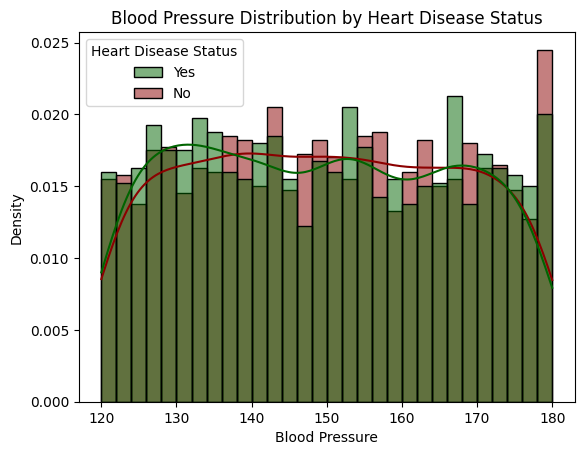

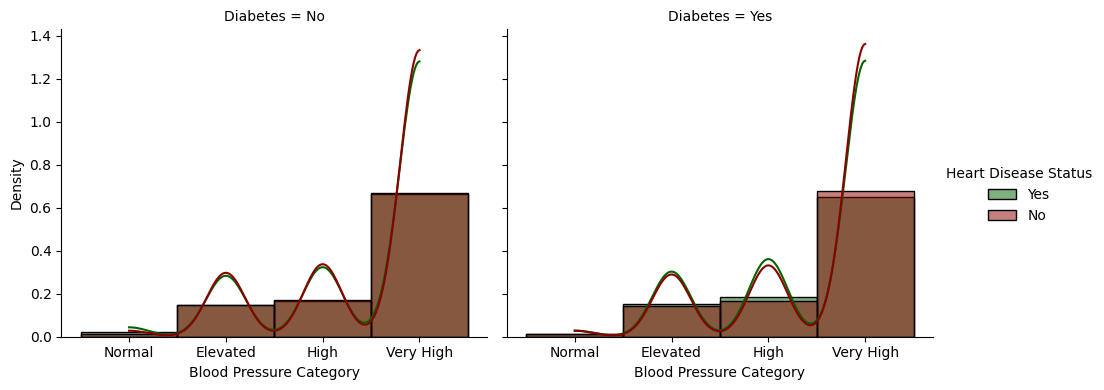

In [ ]:
# Using dropped data and KNNImputer
data_visualization_fran.create_histoplot(cleaned_data, "Blood Pressure", "Heart Disease Status")
data_visualization_fran.create_histoplot(cleaned_data, "Blood Pressure Category", "Heart Disease Status", cat="Diabetes")

# Using Kmodes cleaned data 
data_visualization_fran.create_histoplot(cleaned_data_Kmodes, "Blood Pressure", "Heart Disease Status")
data_visualization_fran.create_histoplot(cleaned_data_Kmodes, "Blood Pressure Category", "Heart Disease Status", cat="Diabetes")